## SciPy library Ordinary Differential Equations Solver

Disclaimer: 
<br> This solution is showcased to share my understanding of the problem and my own approach to it.
<br> This solution is not intended for any general application.

#### For questions, suggestions and further details, please feel free to contact me at juan-carlos.ramirez@warwick.ac.uk

---------

In [1]:
# Step 1: Import and read guide on solve_ivp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
sns.set_theme() # Seaborn templates
plt.rcParams['figure.figsize'] = [16, 8] # Bigger plots

----------
### Finding solutions to the Lorenz System using SciPy's ODE solver
The Lorenz system is a system of ordinary differential equations, notable for having chaotic solutions for certain parameter values and initial conditions. In 1963, Edward Lorenz, with the help of Ellen Fetter, developed a simplified mathematical model for atmospheric convection. The model is a system of three ordinary differential equations now known as the Lorenz equations:

$$\frac{d x}{d t} = \sigma (y - x)$$
$$\frac{d y}{d t} = x (\rho - z) - y$$
$$\frac{d z}{d t} = xy - \beta z $$

Where:
- $\sigma$, $\rho$, and $\beta$ are parameters

Our goal here, is to use SciPy's solve_ipv to solve this system of ODEs according to the following specifications:
- The parameters of the system will be: $\sigma = 10$, $\rho = 28$, and $\beta = \frac{8}{3}$ are parameters.
- The initial condition of the system $(x(0),y(0),z(0))$.
- The time interval will be $[0,t_{f}]$, where $t_{f}$ would preferable in (10,100).
- The parameters fun, t_span, and y0 will be the default ones, or justified if required otherwise.

For the following, we will use SciPy's Solve_ivp function, as described here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

-------

In [2]:
# Step 1.1
def Lorenz_ODEs(t, init, sigma=10.0, rho=28.0, beta=(8.0/3.0)):
    x,y,z = init 
    dx = sigma*(y - x)
    dy = x*(rho - z) - y
    dz = x*y - beta*z
    return dx, dy, dz

After defining the functions that generate the correct input format for SciPy's Solve_ivp function and making use of the default parameters defined in the function, we find the solutions to the Lorenz ODEs, which we visualize next.

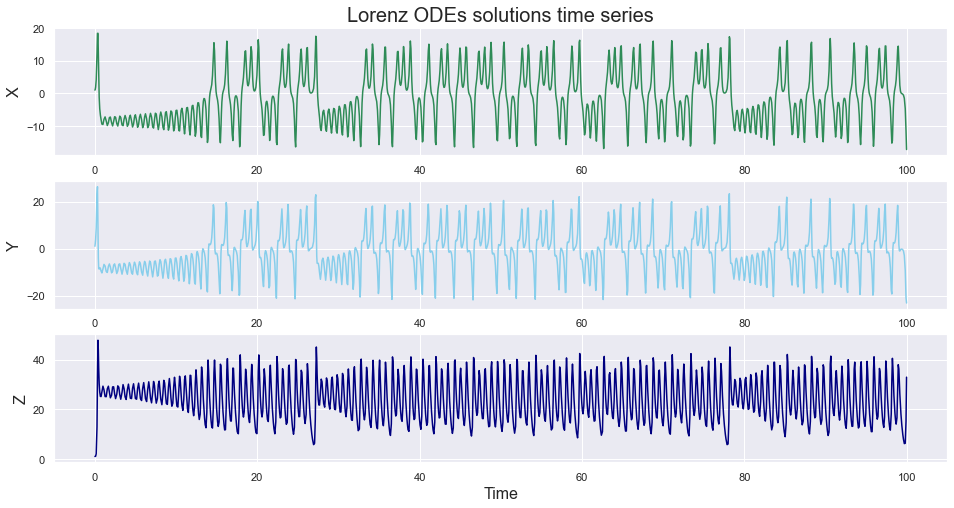

In [3]:
# Step 5 (Chose tf to be 100 and t0 to be [x=1,y=1,z=1])
tf = 100
t0 = (1,1,1)
solutions = solve_ivp(Lorenz_ODEs, (0,tf), t0)

t = solutions.t
x = solutions.y[0,:]
y = solutions.y[1,:]
z = solutions.y[2,:]

# Subplots
plt.subplot(311) 
plt.plot(t, x,color='seagreen')
plt.ylabel('X', fontsize=16)
plt.title('Lorenz ODEs solutions time series', fontsize=20)

plt.subplot(312)
plt.plot(t, y,color='skyblue')
plt.ylabel('Y', fontsize=16)

plt.subplot(313)
plt.plot(t, z,color='navy')
plt.ylabel('Z', fontsize=16)
plt.xlabel('Time',fontsize=16)

plt.show()

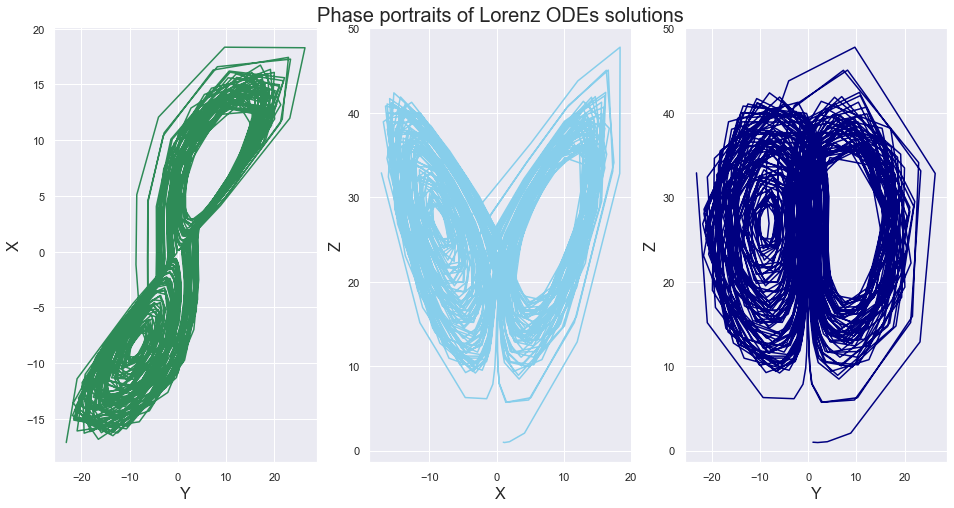

In [4]:
# Subplots
plt.subplot(131)
plt.plot(y, x,color='seagreen')
plt.xlabel('Y', fontsize=16)
plt.ylabel('X', fontsize=16)

plt.subplot(132)
plt.plot(x, z,color='skyblue')
plt.xlabel('X', fontsize=16)
plt.ylabel('Z', fontsize=16)
plt.title('Phase portraits of Lorenz ODEs solutions', fontsize=20)

plt.subplot(133)
plt.plot(y, z,color='navy')
plt.xlabel('Y', fontsize=16)
plt.ylabel('Z', fontsize=16)

plt.show()

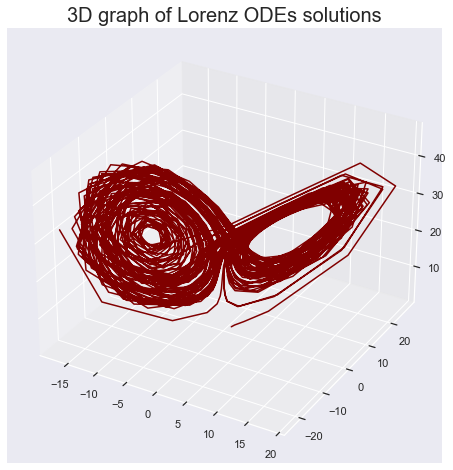

In [5]:
# 3d Plot
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, color='maroon')
plt.title('3D graph of Lorenz ODEs solutions', fontsize=20)
plt.show()

It is not hard to notice the lack of smoothness in our data visualization, therefore, we use the "t_eval" parameter of the "solve_ivp" function, which allows us to control the frequency in which the solutions that we get from solve_ivp are stored.

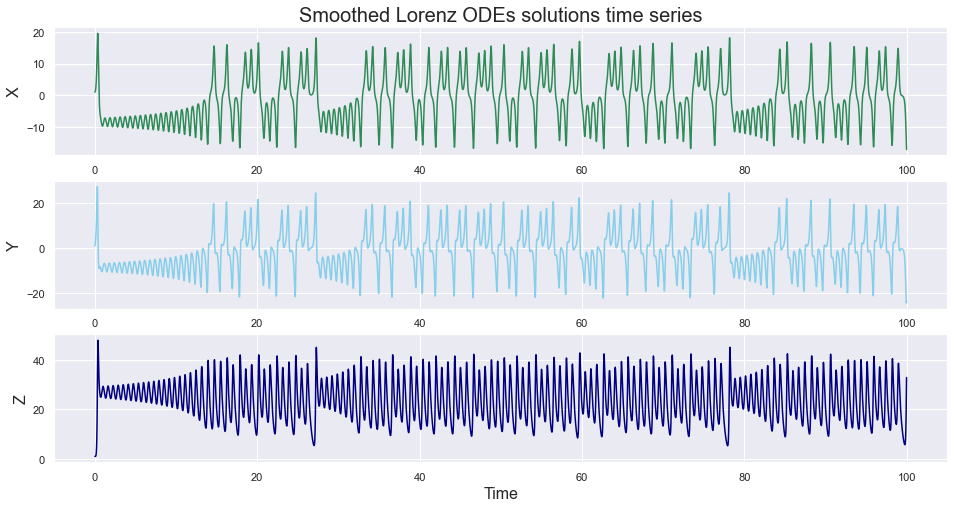

In [6]:
# Step 6 (Step 5 smoothed)
tf = 100
t0 = (1,1,1)
freq = list(np.arange(0,tf,1.0/10000.0)) # ODEs output frequency
solutions = solve_ivp(Lorenz_ODEs, (0,tf), t0, t_eval=freq)

t = solutions.t
x = solutions.y[0,:]
y = solutions.y[1,:]
z = solutions.y[2,:]

# Subplots
plt.subplot(311)  # 3 rows, 1 column, first plot
plt.plot(t, x,color='seagreen')
plt.ylabel('X', fontsize=16)
plt.title('Smoothed Lorenz ODEs solutions time series', fontsize=20)

plt.subplot(312)  # 3 rows, 1 column, second plot
plt.plot(t, y,color='skyblue')
plt.ylabel('Y', fontsize=16)

plt.subplot(313)  # 3 rows, 1 column, third plot
plt.plot(t, z,color='navy')
plt.ylabel('Z', fontsize=16)
plt.xlabel('Time',fontsize=16)

plt.show()

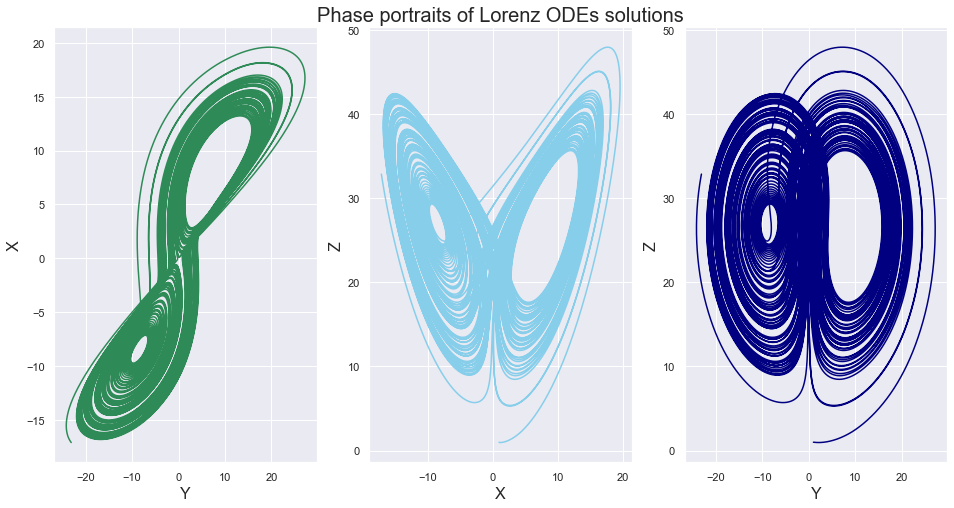

In [7]:
# Subplots
plt.subplot(131)
plt.plot(y, x,color='seagreen')
plt.xlabel('Y', fontsize=16)
plt.ylabel('X', fontsize=16)

plt.subplot(132)
plt.plot(x, z,color='skyblue')
plt.xlabel('X', fontsize=16)
plt.ylabel('Z', fontsize=16)
plt.title('Phase portraits of Lorenz ODEs solutions', fontsize=20)

plt.subplot(133)
plt.plot(y, z,color='navy')
plt.xlabel('Y', fontsize=16)
plt.ylabel('Z', fontsize=16)

plt.show()

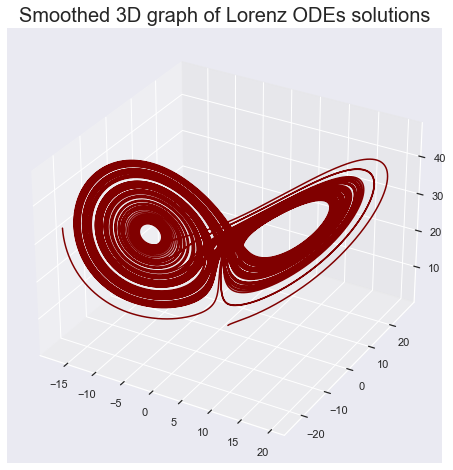

In [8]:
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, color='maroon')
plt.title('Smoothed 3D graph of Lorenz ODEs solutions', fontsize=20)
plt.show()

In our smoothed data visualization, is easier to see the visualization of the sample solutions of what is commonly called the "Lorenz Attractor".

----------

Now, we turn our attention to understand the Lorenz Attractor convergence by looking at different solutions of the System under different methods, relative tolerances and initial values with SciPy's Solve_ivp function.

In [9]:
# Step 7
tf = 100

t0 = (round(np.random.uniform(0,1),2),round(np.random.uniform(0,1),2),round(np.random.uniform(0,1),2))

print("Lorenz system solutions under different configurations (x,y,z) with initial (x,y,z): ",t0)
print("------------------------------------------------------------------------------------------------------------------------------")
print('     Default parameters: ',solve_ivp(Lorenz_ODEs, (0,tf), t0).y[:,-1])
print('     Runge-Kutta of order 8: ',solve_ivp(Lorenz_ODEs, (0,tf), t0, method='DOP853').y[:,-1])
print('     Relative tolerance of 10^-6: ',solve_ivp(Lorenz_ODEs, (0,tf), t0, rtol=1e-6).y[:,-1])
print('     Runge-Kutta of order 8 and relative tolerance of 10^-6: ',solve_ivp(Lorenz_ODEs, (0,tf), t0, method='DOP853',rtol=1e-6).y[:,-1])
print("------------------------------------------------------------------------------------------------------------------------------")

t0 = (round(np.random.uniform(0,1),2),round(np.random.uniform(0,1),2),round(np.random.uniform(0,1),2))

print("Lorenz system solutions under different configurations (x,y,z) with initial (x,y,z): ",t0)
print("------------------------------------------------------------------------------------------------------------------------------")
print('     Default parameters: ',solve_ivp(Lorenz_ODEs, (0,tf), t0).y[:,-1])
print('     Runge-Kutta of order 8: ',solve_ivp(Lorenz_ODEs, (0,tf), t0, method='DOP853').y[:,-1])
print('     Relative tolerance of 10^-6: ',solve_ivp(Lorenz_ODEs, (0,tf), t0, rtol=1e-6).y[:,-1])
print('     Runge-Kutta of order 8 and relative tolerance of 10^-6: ',solve_ivp(Lorenz_ODEs, (0,tf), t0, method='DOP853',rtol=1e-6).y[:,-1])
print("------------------------------------------------------------------------------------------------------------------------------")

t0 = (round(np.random.uniform(0,1),2),round(np.random.uniform(0,1),2),round(np.random.uniform(0,1),2))

print("Lorenz system solutions under different configurations (x,y,z) with initial (x,y,z): ",t0)
print("------------------------------------------------------------------------------------------------------------------------------")
print('     Default parameters: ',solve_ivp(Lorenz_ODEs, (0,tf), t0).y[:,-1])
print('     Runge-Kutta of order 8: ',solve_ivp(Lorenz_ODEs, (0,tf), t0, method='DOP853').y[:,-1])
print('     Relative tolerance of 10^-6: ',solve_ivp(Lorenz_ODEs, (0,tf), t0, rtol=1e-6).y[:,-1])
print('     Runge-Kutta of order 8 and relative tolerance of 10^-6: ',solve_ivp(Lorenz_ODEs, (0,tf), t0, method='DOP853',rtol=1e-6).y[:,-1])
print("------------------------------------------------------------------------------------------------------------------------------")

Lorenz system solutions under different configurations (x,y,z) with initial (x,y,z):  (0.64, 0.57, 0.97)
------------------------------------------------------------------------------------------------------------------------------
     Default parameters:  [-6.25340509 -0.63279914 31.05678801]
     Runge-Kutta of order 8:  [ 1.52534296  2.03185855 16.27288593]
     Relative tolerance of 10^-6:  [ 6.17588802 -1.19291808 32.5571134 ]
     Runge-Kutta of order 8 and relative tolerance of 10^-6:  [ 3.73425874 -0.63452277 28.00085861]
------------------------------------------------------------------------------------------------------------------------------
Lorenz system solutions under different configurations (x,y,z) with initial (x,y,z):  (0.61, 0.2, 0.71)
------------------------------------------------------------------------------------------------------------------------------
     Default parameters:  [-12.50956056  -6.60933681  37.6810525 ]
     Runge-Kutta of order 8:  [-10.405

Inspecting the previous table, we see that when we use different methods (default, Runga-Kutta order 8, Relative tolerance to 10^-6, and a mix of the last two), we do not get the same values, which tells us that the system is not convergent since is highly dependent of the method used to solve it.

Furthermore, we present three random initial states in order to show that the final solution is not only very sensible to the method in which we model the system, but also on the initial conditions of the system, fact that agrees with the notion of the Lorenz System being a chaotic system.